# Clonal inference P2

In this notebook I run the clonal inference model on P2. This patient has nuclear mutations in IDH2, KRAS and NRAS. Furthermore it has a trisomy in chr8. There are 2 time points in the data before and after treatment (Day 0 and Day 15).

## Import packages 



<br>



In [1]:
# Import packages
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import itertools
import os
import pickle
import collections

import time
from datetime import datetime
from timeit import default_timer as timer
from datetime import timedelta

import pyro
import pyro.distributions as dist
import pyro.poutine as poutine
from pyro.infer import SVI, Trace_ELBO, TraceEnum_ELBO, config_enumerate
from pyro.optim import Adam, AdagradRMSProp
from torch.distributions import constraints
pyro.set_rng_seed(100)

# import helper functions and tree class form source code files (present in the same directory)
from helper_functions import *

In [2]:
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
patient = "P2"

# Create tree class object

This class contains all functions required to run the model and to generate diagnostic plots. 

In [6]:
input_file = "../data/input_" + patient + ".json"
t = create_tree_class(input_file, name = patient, mult_samp = True, cnv_celltype = False, gpu = True)

# Run model

In [7]:
# select initial 2 mutations based on the proportion of cells covered
t.sel_mutation(initial = True)

tensor([5, 2])

In [8]:
t.names

['IDH2', 'DNMT3A', 'X2811.G.A', 'X11711.G.A', 'X11604.T.C', 'chr8']

## Initial tree with mt:2811 and mt:11711

Choosing best tree among 4 potential candidates
Model fit to tree 0 in 0m 40s
Model fit to tree 1 in 0m 39s
Model fit to tree 2 in 0m 39s
Model fit to tree 3 in 0m 39s
Trees [0, 1, 3] selected for mutations ['X2811.G.A', 'X11711.G.A']
tensor([[0., 0.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [1., 1.]])
Total run time 0h 2m 40s


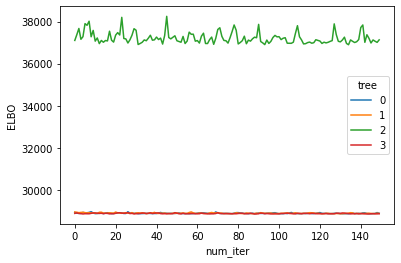

In [6]:
t.select_tree(num_iter = 300, init = 150)

Choosing best tree among 4 potential candidates
Model fit to tree 0 in 0m 11s
Model fit to tree 1 in 0m 10s
Model fit to tree 2 in 0m 10s
Model fit to tree 3 in 0m 10s
Trees [0, 1, 3] selected for mutations ['X2811.G.A', 'X11711.G.A']
tensor([[0., 0.],
        [1., 0.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [1., 1.]])
Total run time 0h 0m 43s


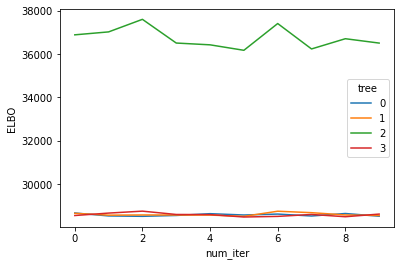

In [6]:
t.select_tree(num_iter = 300, init = 150)

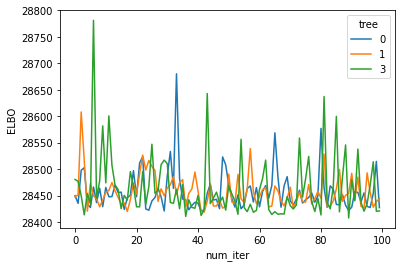

In [17]:
t.print_elbo(300, 200, include = k.tree_indices)

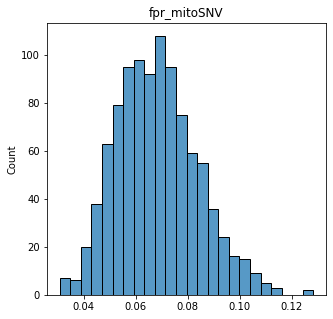

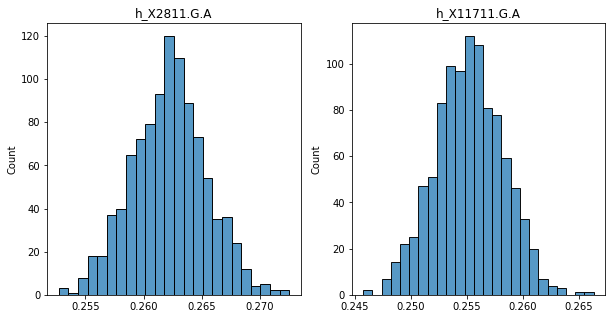

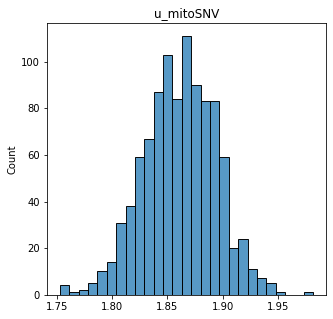

In [18]:
t.plot_posterior("all", 1, 1000)

## Add mt:11604

In [ ]:
# add mutation and select the best tree(s)
t.add_mutation()
t.select_tree(num_iter = 300, init = 150)

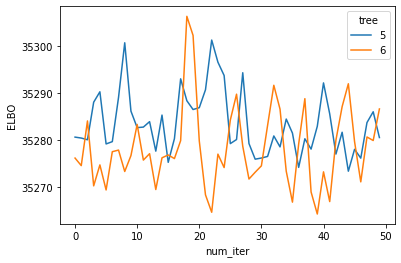

In [20]:
t.print_elbo(300, 250, include = k.tree_indices)

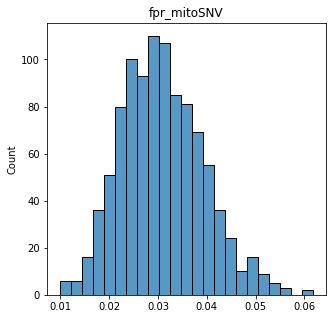

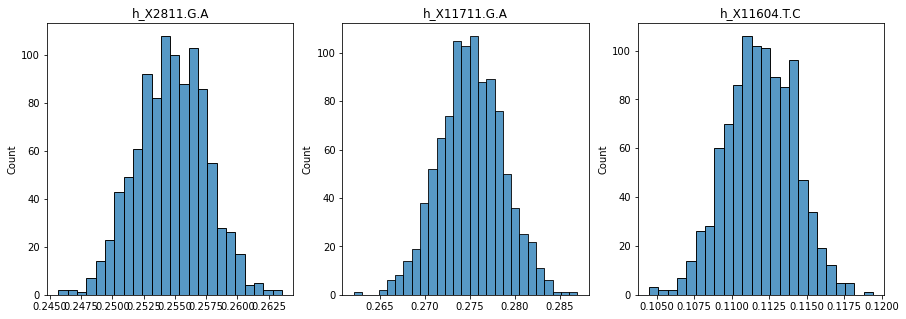

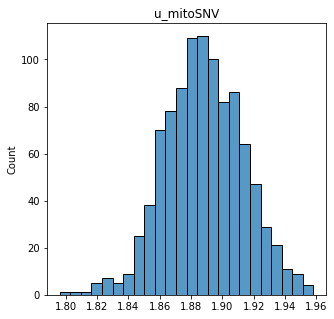

In [21]:
t.plot_posterior("all", 5, 1000)

## Add IDH2

IDH2 added to the tree
Choosing best tree among 17 potential candidates
Model fit to tree 0 in 1m 34s
Model fit to tree 1 in 1m 34s
Model fit to tree 2 in 1m 33s
Model fit to tree 3 in 1m 34s
Model fit to tree 4 in 1m 34s
Model fit to tree 5 in 1m 34s
Model fit to tree 6 in 1m 35s
Model fit to tree 7 in 1m 35s
Model fit to tree 8 in 1m 35s
Model fit to tree 9 in 1m 34s
Model fit to tree 10 in 1m 35s
Model fit to tree 11 in 1m 35s
Model fit to tree 12 in 1m 35s
Model fit to tree 13 in 1m 35s
Model fit to tree 14 in 1m 35s
Model fit to tree 15 in 1m 36s
Model fit to tree 16 in 1m 36s
Trees [8, 1] selected for mutations ['X2811.G.A', 'X11711.G.A', 'X11604.T.C', 'IDH2']
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 1.],
        [1., 1., 1., 1.]])
Total run time 0h 26m 56s


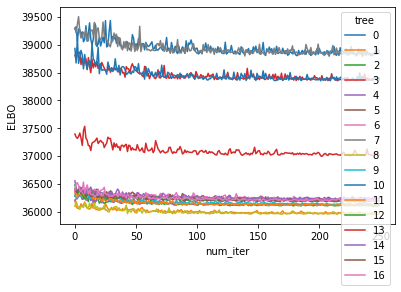

In [22]:
# add mutation and select the best tree(s)
t.add_mutation()
t.select_tree(num_iter = 300, init = 150)

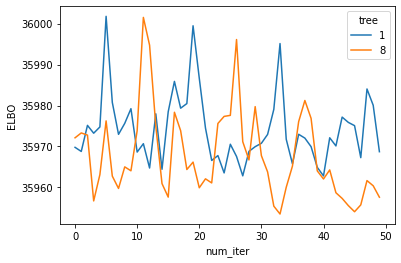

In [23]:
t.print_elbo(300, 250, include = k.tree_indices)

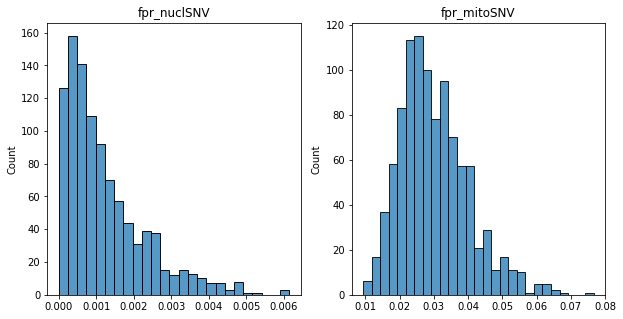

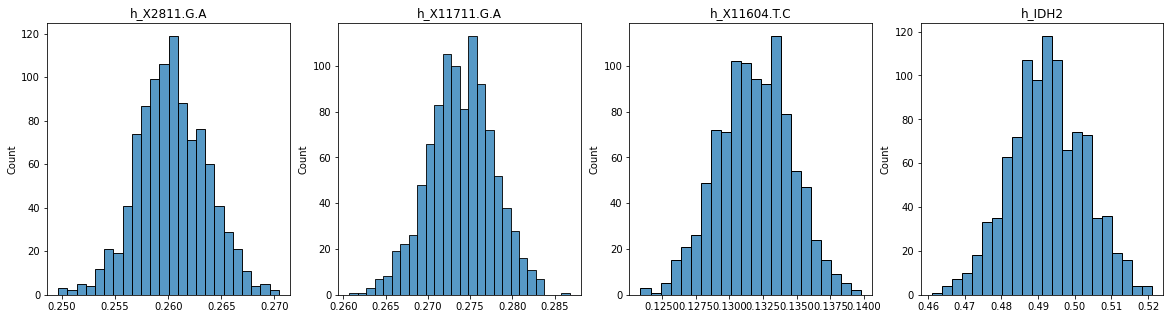

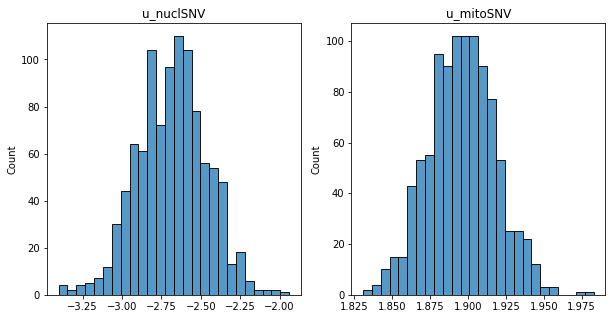

In [24]:
k.plot_posterior(tree = 8, variables = "all")

## Add DNMT3A

DNMT3A added to the tree
Choosing best tree among 23 potential candidates
Model fit to tree 0 in 1m 53s
Model fit to tree 1 in 1m 52s
Model fit to tree 2 in 1m 51s
Model fit to tree 3 in 1m 52s
Model fit to tree 4 in 1m 51s
Model fit to tree 5 in 1m 51s
Model fit to tree 6 in 1m 52s
Model fit to tree 7 in 1m 52s
Model fit to tree 8 in 1m 51s
Model fit to tree 9 in 1m 52s
Model fit to tree 10 in 1m 53s
Model fit to tree 11 in 1m 52s
Model fit to tree 12 in 1m 53s
Model fit to tree 13 in 1m 52s
Model fit to tree 14 in 1m 52s
Model fit to tree 15 in 1m 52s
Model fit to tree 16 in 1m 54s
Model fit to tree 17 in 1m 54s
Model fit to tree 18 in 1m 52s
Model fit to tree 19 in 1m 55s
Model fit to tree 20 in 1m 53s
Model fit to tree 21 in 1m 53s
Model fit to tree 22 in 1m 53s
Trees [1, 2, 4, 14, 15] selected for mutations ['X2811.G.A', 'X11711.G.A', 'X11604.T.C', 'IDH2', 'DNMT3A']
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 1., 1

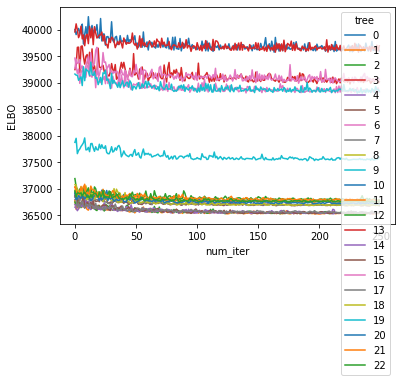

In [25]:
# add mutation and select the best tree(s)
t.add_mutation()
t.select_tree(num_iter = 300, init = 50)
# save tree object
with open("svi_objects/tree_K.pickle", "wb") as out:
    pickle.dump(t, out, pickle.HIGHEST_PROTOCOL)

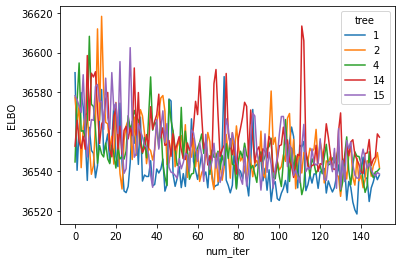

In [14]:
k.print_elbo(num_iter = 300, init = 150, include = k.tree_indices)

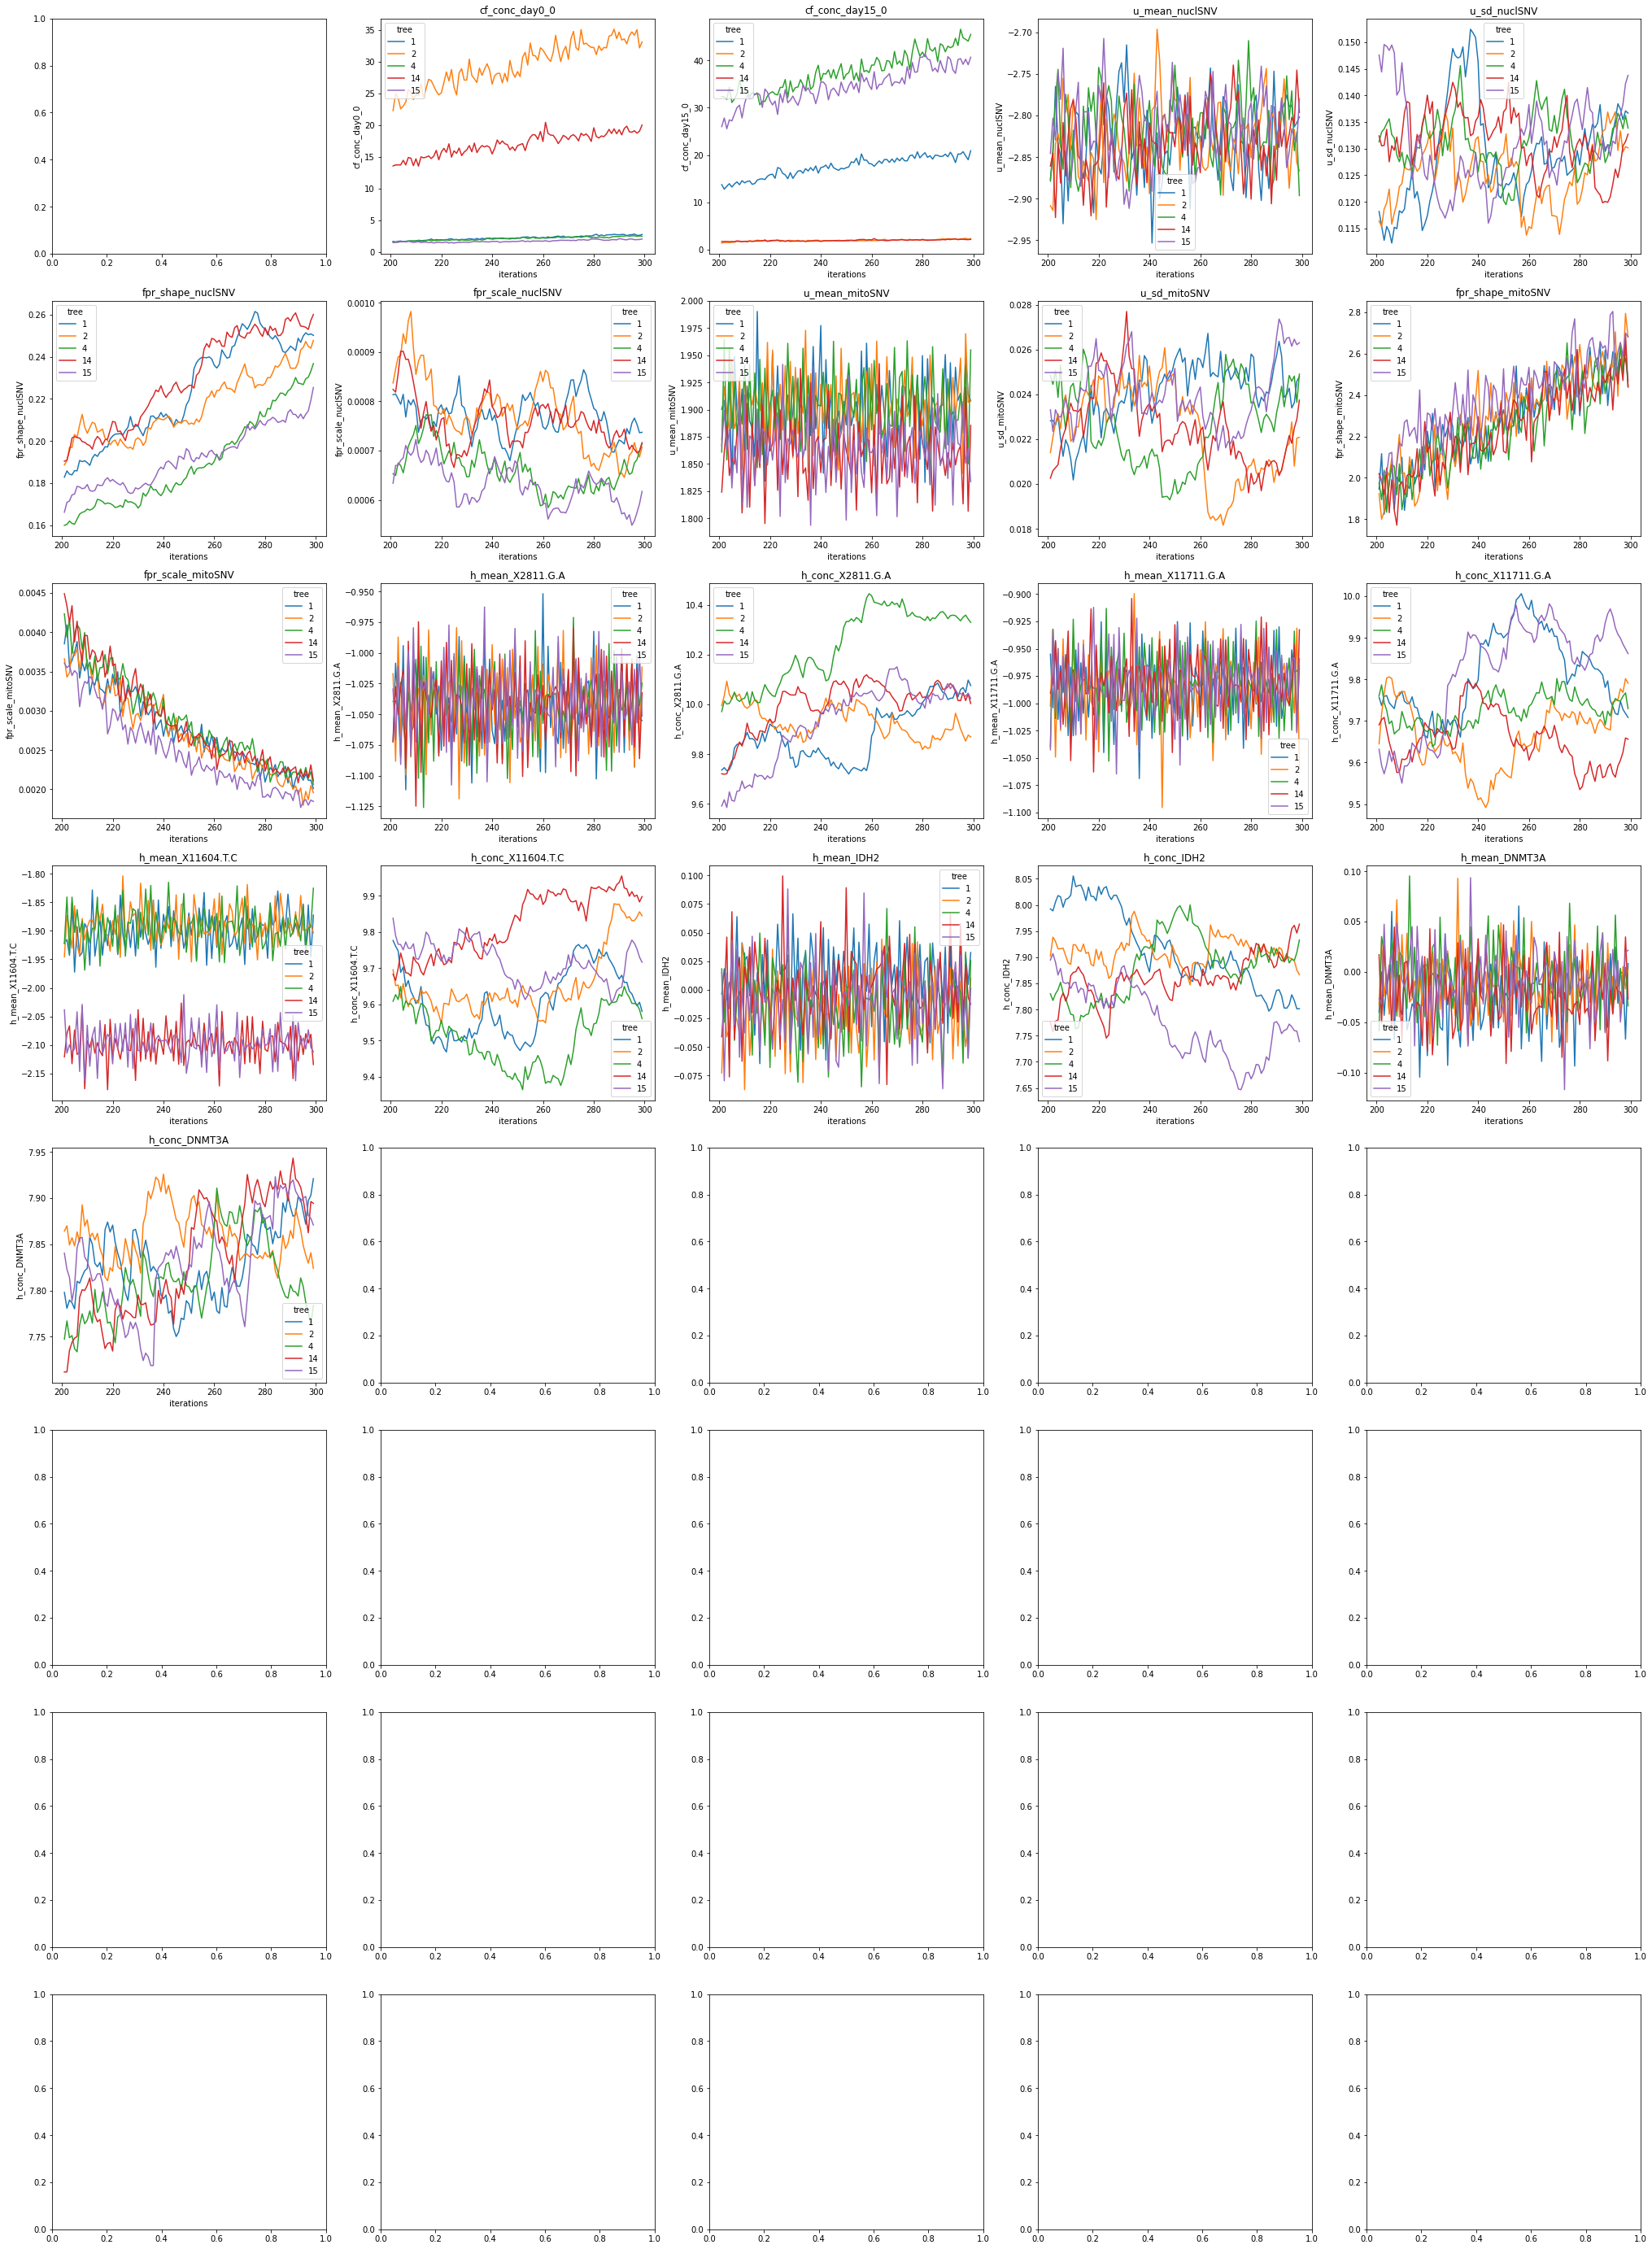

In [8]:
t.print_params(include = t.tree_indices, it = 200)

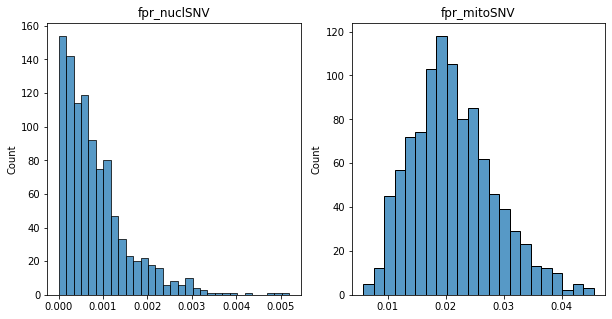

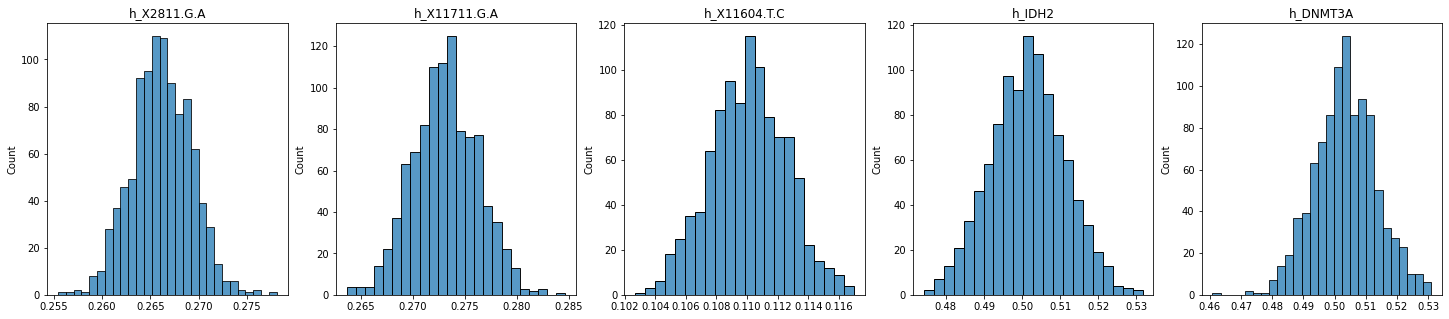

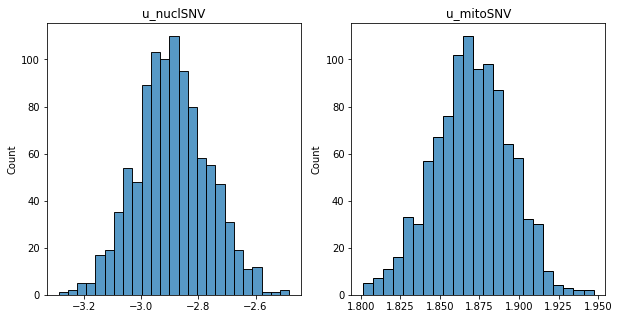

In [15]:
# plot posterior distributions
t.plot_posterior(variables = "all",tree = 15)

# Clonal probabilities

In [17]:
for i in range(len(t.tree_indices)):
    t.clonal_assignment(tree = i)

Computing clonal assignment probabilities for tree 0
Clonal assignment probabilities computed in 1m and 47s
Computing clonal assignment probabilities for tree 1
Clonal assignment probabilities computed in 1m and 46s
Computing clonal assignment probabilities for tree 2
Clonal assignment probabilities computed in 1m and 47s
Computing clonal assignment probabilities for tree 3
Clonal assignment probabilities computed in 1m and 46s
Computing clonal assignment probabilities for tree 4
Clonal assignment probabilities computed in 1m and 44s


In [18]:
import collections
collections.Counter(np.argmax(k.clone_probs[3].cpu().detach().numpy(), axis = 1))

Counter({3: 252, 5: 5941, 2: 4606, 4: 11, 0: 8})

# Posterior predictive

In [5]:
# Get posterior predictive for tree with all mutations merge in one clone
k.get_post_predictive(tree = 15, num_samples = k.M.shape[0])
with open("svi_objects/tree_K.pickle", "wb") as f:
    pickle.dump(k,f, protocol=pickle.HIGHEST_PROTOCOL)

# Save object and pickle

In [6]:
# export object as pickle
k.export_pickle("svi_objects/AKLK.pickle")

Tree object saved as pickle!


In [4]:
# with open("svi_objects/tree_K.pickle", "rb") as f:
#     k = pickle.load(f)